# Usage Example

- How to generate a DRR
- How to gradients with respect to DRR parameters

In [1]:
import matplotlib.pyplot as plt
import torch

from diffdrr import load_example_ct, DRR
from diffdrr.visualization import plot_drr

## DRR Generation

The generator is implemented as a custom PyTorch module.

All raytracing operations have been formulated in a vectorized function, enabling use of PyTorch's GPU support and autograd.
This also means that DRR generation is available as a layer in deep learning frameworks.

Timing results are on a single NVIDIA RTX 2080 Ti GPU.

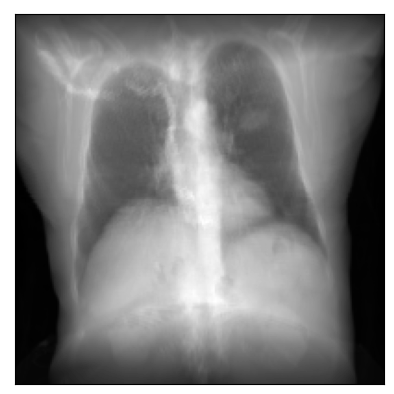

In [2]:
# Read in the volume
volume, spacing = load_example_ct()

# Get parameters for the detector
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
detector_kwargs = {
    "sdr"   : 300.0,
    "theta" : torch.pi,
    "phi"   : 0,
    "gamma" : torch.pi / 2,
    "bx"    : bx,
    "by"    : by,
    "bz"    : bz,
}

# Make the DRR
drr = DRR(volume, spacing, height=200, delx=4.0, device="cuda")
img = drr(**detector_kwargs)  # Parameters need to be initialized only once
ax = plot_drr(img, ticks=False)
plt.savefig("../figures/example_DRR.pdf", bbox_inches="tight")
plt.show()

In [3]:
%timeit drr()

48.8 ms ± 52.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Gradients

Gradients of input parameters are computable with autograd.

In [4]:
torch.autograd.set_detect_anomaly(True)

img.mean().backward(retain_graph=True)
drr.rotations.grad, drr.translations.grad

(tensor([[ 5457.1030, -1345.2490, -3428.1663]], device='cuda:0'),
 tensor([[ 784.7563, -110.3357, -115.8160]], device='cuda:0'))

## Try the M1 GPU

Certain PyTorch functions have not yet been ported :(

In [5]:
# Make DRR
drr = DRR(volume, spacing, height=200, delx=1.4e-2, device="mps")
img = drr(**detector_kwargs)

plot_drr(drr)
plt.show()

ValueError: mps is not available